# Task : Classify different types of Chocolates

- Problem : Binary Image Classification
- Dataset : https://www.kaggle.com/datasets/siddharthmandgi/chocolate-classification
- Approach : Using Convolutional Neural Networks and Tensorflow's Network architecture


# Importing Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Importing Data

In [2]:
#### Here we are trying to import data from directories and storing them in a dataset along with the target values

image_paths = []
target = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        image_paths.append(os.path.join(dirname, filename))
        target.append(dirname.split("/")[-1])
        
        
df = pd.DataFrame({'image_paths':image_paths, 'target':target})
df

,image_paths,target
0,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
1,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
2,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
3,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
4,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
...,...,...
132,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
133,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
134,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
135,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate


# Visualizing Classes 

White Chocolate 



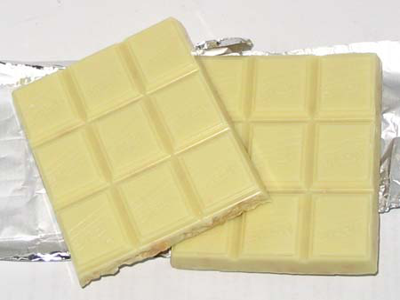

In [3]:
print(df.target[7],'\n')
Image.open(df.image_paths[7]).resize((400,300))

Dark Chocolate 



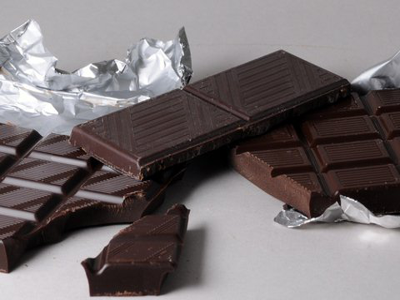

In [4]:
print(df.target[73],'\n')
Image.open(df.image_paths[73]).resize((400,300))

#### Lets check if our dataset is balanced

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


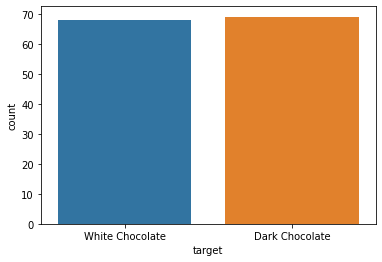

In [5]:
### A basic countplot plot comparing the no of occurances for each class
sns.countplot(df["target"],orient="V")
plot = plt.show()

 This shows that the dataset is pretty balanced having almost equal values of both classes which will be perfect for classification

In [6]:
### Another faster way
df.target.value_counts()

Dark Chocolate     69
White Chocolate    68
Name: target, dtype: int64

In [7]:
#### Shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)
df

,image_paths,target
0,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
1,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
2,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
3,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
4,/kaggle/input/chocolate-classification/Chocola...,White Chocolate
...,...,...
132,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
133,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
134,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate
135,/kaggle/input/chocolate-classification/Chocola...,Dark Chocolate


# Theory : Convolutional Neural Network (CNN)
The approach behind our classification model here is Covolutional Neural Networks or CNN's

### Brief Definition:
A Convolutional Neural Network (ConvNet/CNN) is a ***Deep Learning Neural Network mostly used for images*** which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

<img src = "https://www.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png" width ="1000">


### Layers of CNN
- Input Layer: Importing the images into the network pipeline with input size = the image size 
- CNN Layer Stack: A typical CNN layer stack will include a convolutional layer, and a Max Pooling Layer (could include layers like Dropout layers (regualarization), Padding layers, etc.) and a network can have many of such CNN layer stacks
- Fully Connected Layer (Dense): After passing through the Convolutional Filters the images are flattened using Flattening Layers and Passed on to the Fully Connected or Dense Layer which deals with an array of values. The last layer will typically be a Dense Layer with sigmoid or softmax function (binary or multiclass classification) with the output size = the number of classes 
 


# Building a TensorFlow Model

- Data Augmentation and Genration
- Model Architecture
- Compile, fit and Callbacks

### Creating a Datagen for Image Augmentation and Data Generation

Data generator which applies augmentation techniques such as rescaling, rotation, height shift etc.

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

This datagen will be a part of a tensorflow dataset which will enable the images to flow from dataset or directory (In our case dataset) into the tensorflow network while applying image augmentation on each image

In [9]:
IMG_SIZE = 64
BATCH = 16
SEED = 42

ds_train = datagen.flow_from_dataframe(df,
                                     #directory=train_path, #dataframe contains the full paths
                                     x_col = 'image_paths',
                                     y_col = 'target',
                                     target_size = (IMG_SIZE, IMG_SIZE),
                                     class_mode = 'binary',
                                     batch_size = BATCH,
                                     seed = SEED)

Found 137 validated image filenames belonging to 2 classes.


### Desigining the model architecture

- We are using a Tensorflow Network to build a model and classify. Keras is just an API of Tensorflow 2.0 to make tf highly approachable and easy for model buidling

There are two types of Architectures while buidling a tensorflow model
- Sequential API : The architecture design is such in which we add layers one after the other in a sequential order
- Functional API : More Flexible where the next layer is the function of the last layer

We will be using a Sequential Model here

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

2022-07-04 16:48:43.592550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:43.692712: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:43.693475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:43.695340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

2022-07-04 16:48:43.695729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:43.696723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:43.697633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:45.769527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 16:48:45.770395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

### Visualize the model architecture

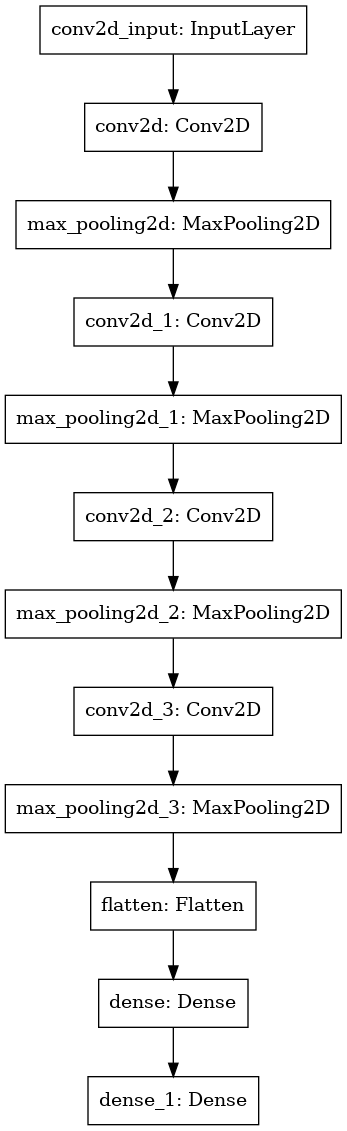

In [11]:
tf.keras.utils.plot_model(model)

### Compile, Fit and Callbacks

In [12]:
### Save the best model
saved_callbacks = tf.keras.callbacks.ModelCheckpoint('./saved_models/bestmodel',
                                     save_weights_only=False, 
                                     monitor='loss', 
                                     save_best_only=True)
    
### Complie and Fit Model 
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy',])  

history = model.fit(ds_train, epochs=25, verbose=2,
                   callbacks=[saved_callbacks]
    )

2022-07-04 16:48:47.688641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-07-04 16:48:49.245027: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


9/9 - 11s - loss: 0.6823 - accuracy: 0.5109


2022-07-04 16:48:58.792218: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/25
9/9 - 3s - loss: 0.5767 - accuracy: 0.8248
Epoch 3/25
9/9 - 3s - loss: 0.4386 - accuracy: 0.8467
Epoch 4/25
9/9 - 3s - loss: 0.3431 - accuracy: 0.8394
Epoch 5/25
9/9 - 3s - loss: 0.3625 - accuracy: 0.8467
Epoch 6/25
9/9 - 3s - loss: 0.2778 - accuracy: 0.9197
Epoch 7/25
9/9 - 3s - loss: 0.2491 - accuracy: 0.8978
Epoch 8/25
9/9 - 3s - loss: 0.2266 - accuracy: 0.8978
Epoch 9/25
9/9 - 3s - loss: 0.2116 - accuracy: 0.9124
Epoch 10/25
9/9 - 3s - loss: 0.2163 - accuracy: 0.9197
Epoch 11/25
9/9 - 3s - loss: 0.1616 - accuracy: 0.9270
Epoch 12/25
9/9 - 3s - loss: 0.1504 - accuracy: 0.9489
Epoch 13/25
9/9 - 4s - loss: 0.2032 - accuracy: 0.9197
Epoch 14/25
9/9 - 3s - loss: 0.1574 - accuracy: 0.9489
Epoch 15/25
9/9 - 3s - loss: 0.1809 - accuracy: 0.9416
Epoch 16/25
9/9 - 3s - loss: 0.1157 - accuracy: 0.9708
Epoch 17/25
9/9 - 3s - loss: 0.1264 - accuracy: 0.9562
Epoch 18/25
9/9 - 3s - loss: 0.1845 - accuracy: 0.9270
Epoch 19/25
9/9 - 3s - loss: 0.1485 - accuracy: 0.9562
Epoch 20/25
9/9 - 

In [13]:
model = tf.keras.models.load_model('./saved_models/bestmodel')

# Visualize the Model Performance

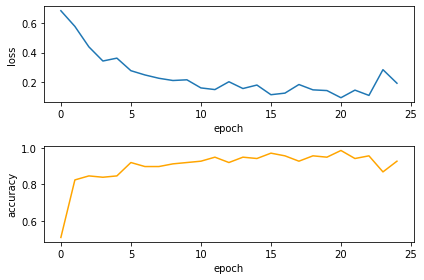

In [14]:
plt.subplot(2 ,1, 1)
a = plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')


plt.subplot(2, 1 ,2)
b = plt.plot(history.history['accuracy'],color="orange")
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()